#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#READ DATA

In [ ]:
#data_clean = pd.read_csv("drive/My Drive/Colab Notebooks/CpcProyect/data/data_cleaned.csv")
data_mining = pd.read_csv('drive/My Drive/Colab Notebooks/CpcProyect/data/MiningProcess_Flotation_Plant_Database.csv',decimal=",",parse_dates=["date"],infer_datetime_format=True).drop_duplicates()
#data_mining = pd.read_csv('drive/My Drive/Colab Notebooks/CpcProyect/data/Copia de MiningProcess_Flotation_Plant_Database.csv')

In [ ]:
data_mining.head().transpose()

,0,1,2,3,4
date,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00
% Iron Feed,55.2,55.2,55.2,55.2,55.2
% Silica Feed,16.98,16.98,16.98,16.98,16.98
Starch Flow,3019.53,3024.41,3043.46,3047.36,3033.69
Amina Flow,557.434,563.965,568.054,568.665,558.167
Ore Pulp Flow,395.713,397.383,399.668,397.939,400.254
Ore Pulp pH,10.0664,10.0672,10.068,10.0689,10.0697
Ore Pulp Density,1.74,1.74,1.74,1.74,1.74
Flotation Column 01 Air Flow,249.214,249.719,249.741,249.917,250.203
Flotation Column 02 Air Flow,253.235,250.532,247.874,254.487,252.136


In [ ]:
data_mining.shape

(736282, 24)

#First view of the data

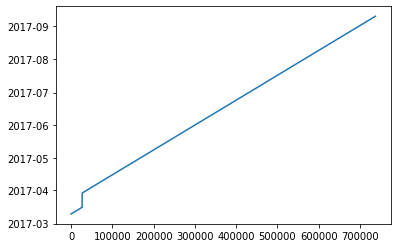

In [ ]:
# [date] plot
df = data_mining['date']
plt.plot(df[0:])

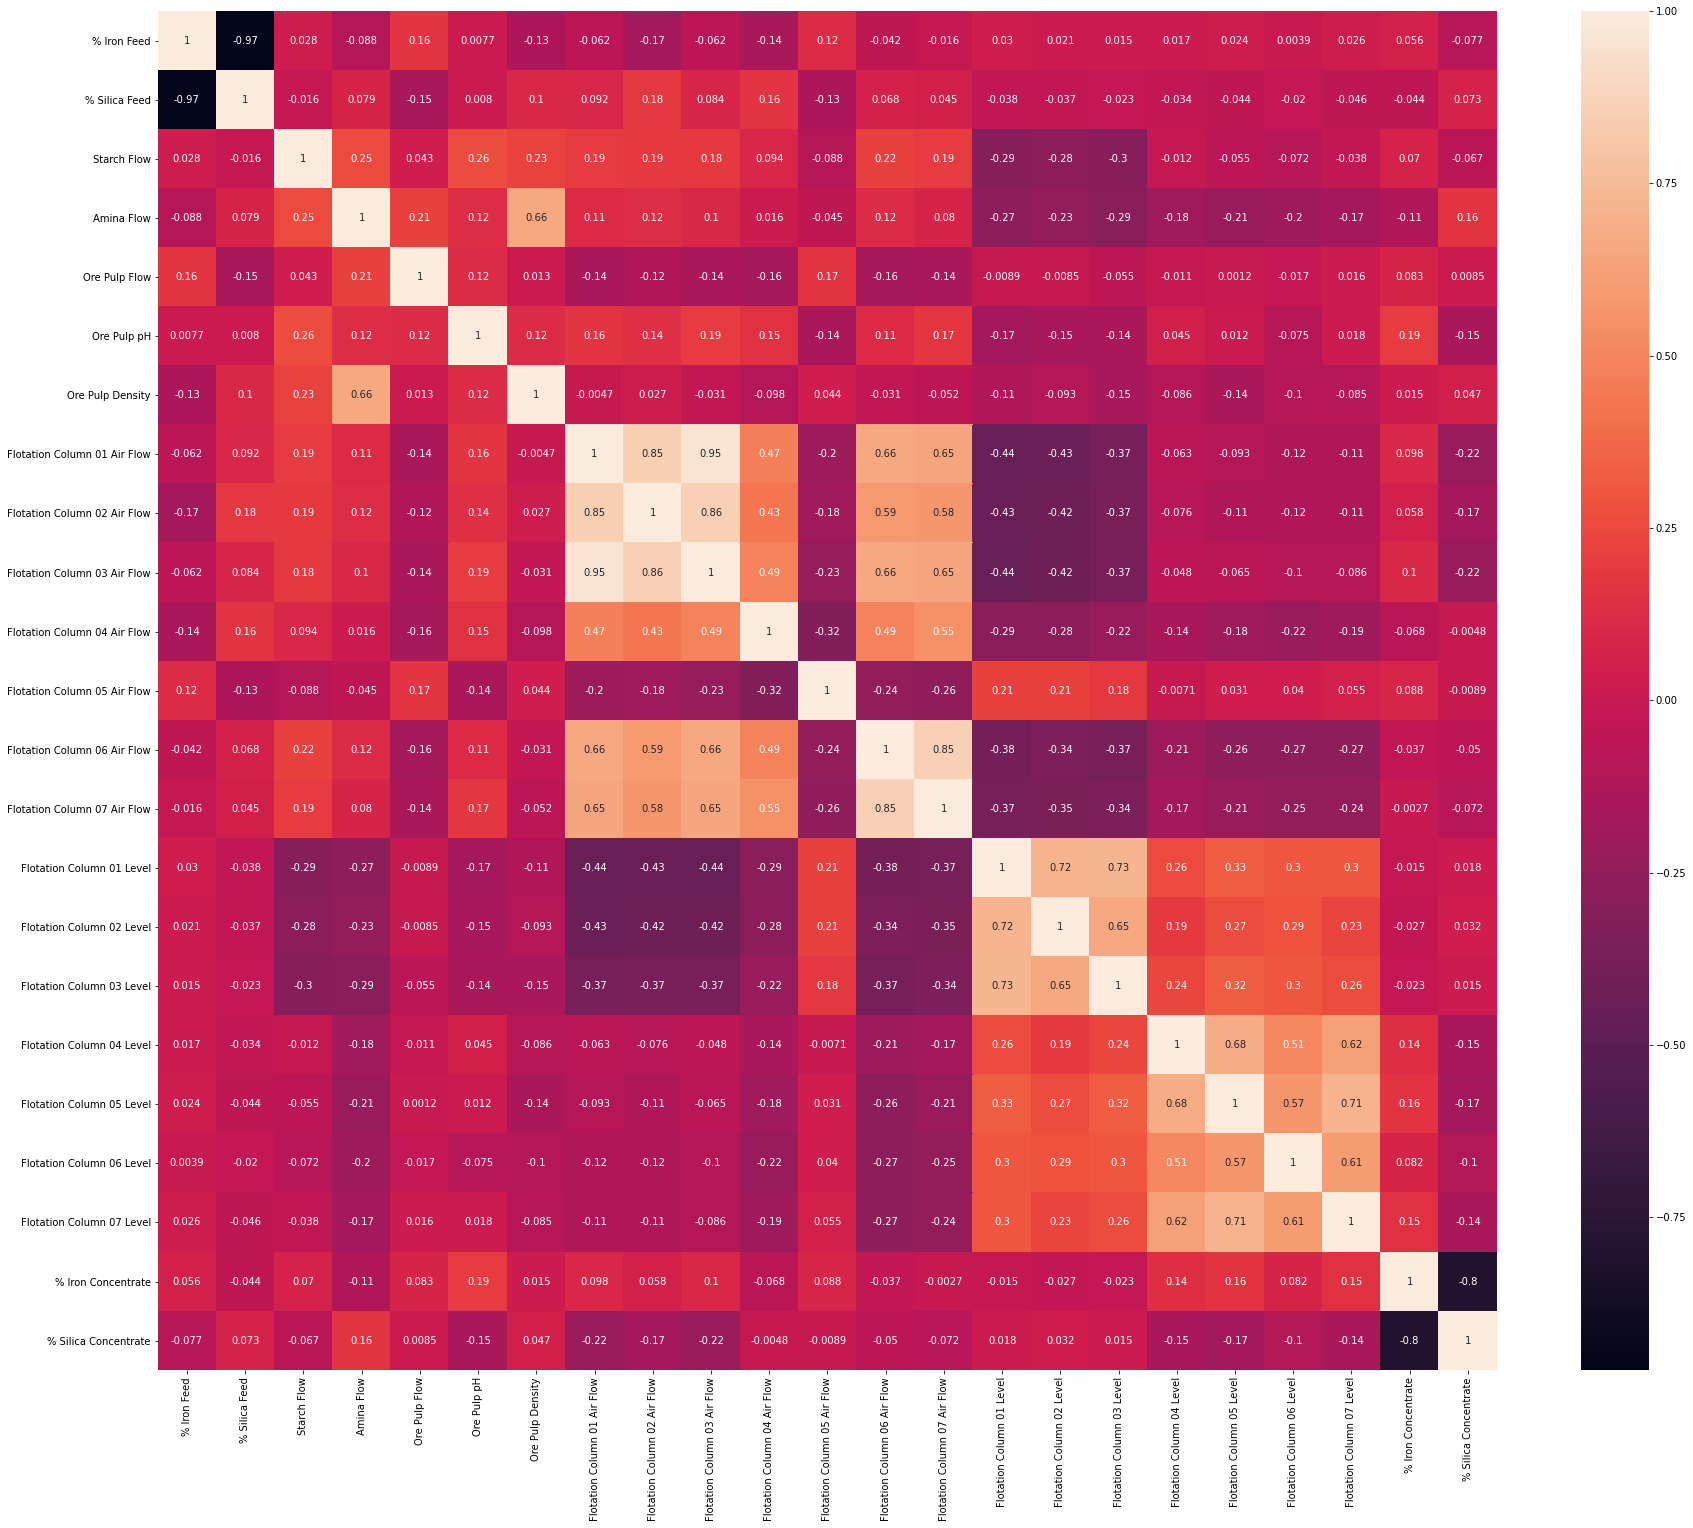

In [ ]:
#create corrmatrix
plt.figure(figsize=(30, 25))
corr_matrix = data_mining.corr()

sn.heatmap(corr_matrix , annot=True)
plt.savefig("corr_matrix.pdf")
plt.show()

In [ ]:
df_corr = pd.DataFrame(corr_matrix)

corr_values = np.array(df_corr.iloc[22]) #drop sclica 
corr_values = corr_values[0:len(corr_values)-1]

corr_names = np.array(df_corr.columns)
corr_names = corr_names[0:len(corr_names)-1] #drop sclica name
#corr_names = np.array(corr_names.columns)


plt.figure(figsize=(17,8))
plt.barh(corr_names, corr_values, color="salmon", edgecolor="black")
plt.title("Correlation Values for % Silica Concentrate", fontsize=30)
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=10)
plt.savefig("corr_silicia.pdf")
plt.show()

NameError: ignored

In [ ]:
#resampling without mean 
names = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
 
 
ts = 175
for x in range(1,data_mining.shape[1]):
  data = [] #clear data 
  n = 0 #set counter
 
  while n*ts <= round(data_mining.shape[0]):
    sample_mean_value = data_mining.iloc[(ts*n),x]  #sampling data and save mean of n*ts elements
    data += [sample_mean_value]   #save sampling into a list
    data_array = np.array(data)   #list to array
    data_array= np.transpose(data_array)  #transpose
    df = pd.DataFrame(data_array)   #array to dataframe
    n += 1  #counter up 
 
  if x == 1:
    df_first = df
  if x == 2:
    new_df_notmean = pd.concat([df_first, df], axis = 1)
  if x > 2: 
    new_df_notmean = pd.concat([new_df_notmean, df], axis=1) 
 
new_df_notmean.columns = names

In [ ]:
new_df_notmean.to_csv('resampling_data_without_mean.csv')

In [ ]:
#resampling with mean 

names = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
 
 
ts = 175
for x in range(1,data_mining.shape[1]):
  data = [] #clear data 
  n = 0 #set counter
 
  while n*ts <= round(data_mining.shape[0]):
    sample_mean_value = data_mining.iloc[(ts*n):(ts*(n+1)),x].mean()  #sampling data and save mean of n*ts elements
    data += [sample_mean_value]   #save sampling into a list
    data_array = np.array(data)   #list to array
    data_array= np.transpose(data_array)  #transpose
    df = pd.DataFrame(data_array)   #array to dataframe
    n += 1  #counter up 
 
  if x == 1:
    df_first = df
  if x == 2:
    new_df = pd.concat([df_first, df], axis = 1)
  if x > 2: 
    new_df = pd.concat([new_df, df], axis=1) 
 
new_df.columns = names

In [ ]:
new_df.to_csv('resampling_data.csv')

In [ ]:
#remove output %iron concentrate 
#new_df = data_mining.drop(labels=['date','% Iron Concentrate'], axis = 1)
new_df = new_df.drop(labels=[ '% Iron Concentrate'], axis = 1)

KeyError: ignored

# CLASIC NN

In [ ]:
#define x's and y 
x = new_df.drop(labels='% Silica Concentrate', axis=1)
y = new_df['% Silica Concentrate']

In [ ]:
# Create train/test
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.3, random_state=42)

In [ ]:
#Import TensorFlow and keras
 
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore

Note: using Google CoLab


In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)

In [ ]:
 
#Build a NN
 
model = Sequential()
model.add(Dense(22, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(18, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size = 10,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=100)

Train on 2945 samples, validate on 1263 samples
Epoch 1/100
 - 1s - loss: 30.9155 - accuracy: 0.0000e+00 - val_loss: 9.2346 - val_accuracy: 0.0000e+00
Epoch 2/100
 - 0s - loss: 6.6378 - accuracy: 3.3956e-04 - val_loss: 5.4216 - val_accuracy: 0.0000e+00
Epoch 3/100
 - 0s - loss: 5.3554 - accuracy: 3.3956e-04 - val_loss: 4.4228 - val_accuracy: 0.0000e+00
Epoch 4/100
 - 0s - loss: 4.0717 - accuracy: 3.3956e-04 - val_loss: 3.7559 - val_accuracy: 0.0000e+00
Epoch 5/100
 - 0s - loss: 3.7048 - accuracy: 0.0000e+00 - val_loss: 2.8941 - val_accuracy: 0.0000e+00
Epoch 6/100
 - 0s - loss: 2.6968 - accuracy: 0.0000e+00 - val_loss: 3.1374 - val_accuracy: 0.0000e+00
Epoch 7/100
 - 0s - loss: 2.9290 - accuracy: 3.3956e-04 - val_loss: 2.5593 - val_accuracy: 0.0000e+00
Epoch 8/100
 - 0s - loss: 2.5935 - accuracy: 3.3956e-04 - val_loss: 2.4537 - val_accuracy: 0.0000e+00
Epoch 9/100
 - 0s - loss: 2.1967 - accuracy: 0.0000e+00 - val_loss: 1.5091 - val_accuracy: 7.9177e-04
Epoch 10/100
 - 0s - loss: 2.3782

In [ ]:
model.evaluate(x_test,y_test)

6903/6903 [==============================] - 7s 1ms/step - loss: 0.7632 - accuracy: 0.0038


[0.7632261514663696, 0.0038300473242998123]

In [ ]:
model.history.history

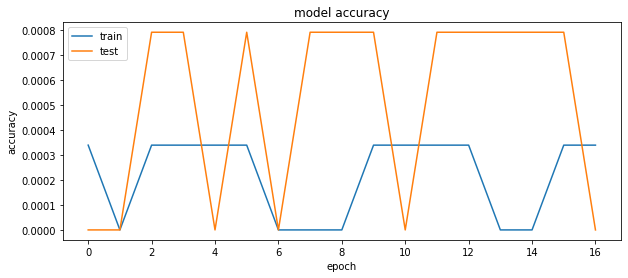

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

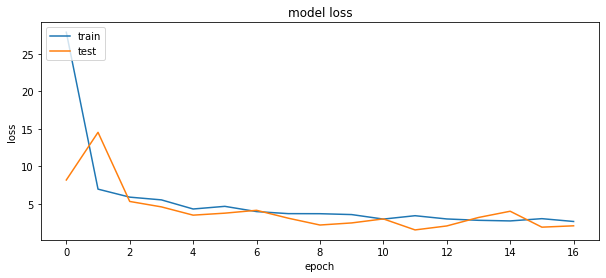

In [ ]:
# summarize history for loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

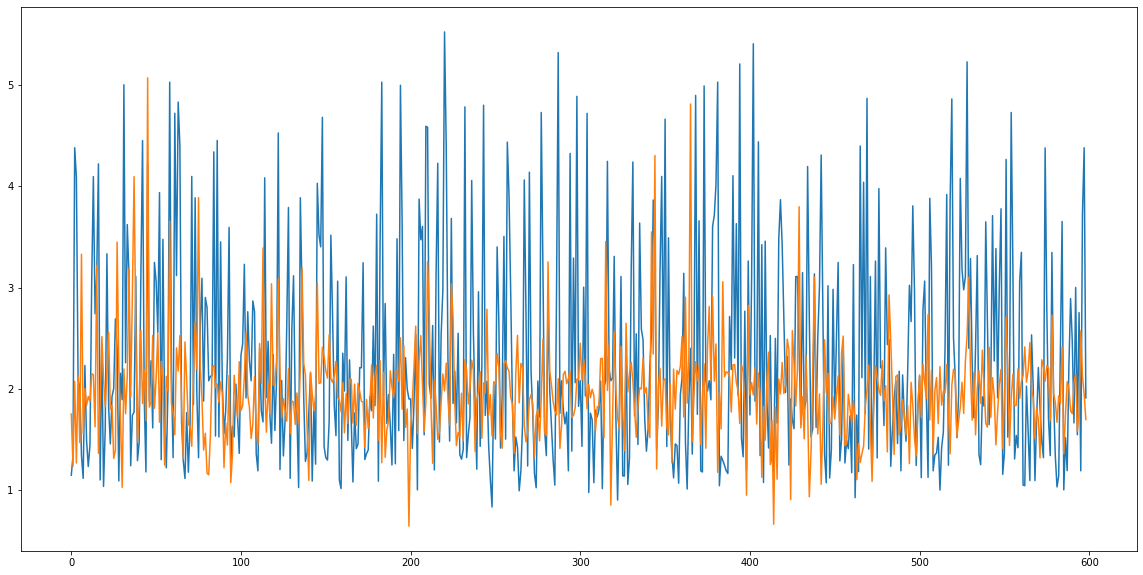

In [ ]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 10))
plt.plot(y_test.values[1:600])
plt.plot(pred[1:600])
plt.savefig("regression.pdf")
plt.show()

In [ ]:
from sklearn import metrics
 
# Predict
pred = model.predict(x_test)
 
# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 4.140525664352348


In [ ]:
 
import numpy as np
 
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 2.034828165804756


# LSTM IMPLEMENTATION with mean()





In [ ]:

from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



values = new_df.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[(reframed.shape[1]-21):(reframed.shape[1]-1)], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
n_train_hours = round(reframed.shape[0] * 0.8) #70% of data for training
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


from tensorflow.keras.callbacks import EarlyStopping



# design network
model = Sequential()
model.add(LSTM(5, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=30, validation_data=(test_X, test_y), verbose=2, shuffle=False)

 

(3366, 1, 23) (3366,) (841, 1, 23) (841,)
Epoch 1/100
113/113 - 0s - loss: 0.2283 - val_loss: 0.1876
Epoch 2/100
113/113 - 0s - loss: 0.1813 - val_loss: 0.1847
Epoch 3/100
113/113 - 0s - loss: 0.1774 - val_loss: 0.1811
Epoch 4/100
113/113 - 0s - loss: 0.1733 - val_loss: 0.1773
Epoch 5/100
113/113 - 0s - loss: 0.1694 - val_loss: 0.1739
Epoch 6/100
113/113 - 0s - loss: 0.1655 - val_loss: 0.1702
Epoch 7/100
113/113 - 0s - loss: 0.1617 - val_loss: 0.1663
Epoch 8/100
113/113 - 0s - loss: 0.1576 - val_loss: 0.1625
Epoch 9/100
113/113 - 0s - loss: 0.1538 - val_loss: 0.1588
Epoch 10/100
113/113 - 0s - loss: 0.1499 - val_loss: 0.1550
Epoch 11/100
113/113 - 0s - loss: 0.1457 - val_loss: 0.1510
Epoch 12/100
113/113 - 0s - loss: 0.1416 - val_loss: 0.1470
Epoch 13/100
113/113 - 0s - loss: 0.1372 - val_loss: 0.1425
Epoch 14/100
113/113 - 0s - loss: 0.1328 - val_loss: 0.1382
Epoch 15/100
113/113 - 0s - loss: 0.1281 - val_loss: 0.1336
Epoch 16/100
113/113 - 0s - loss: 0.1233 - val_loss: 0.1288
Epoch 1

# Save model

In [ ]:
#save the model
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#READ MODEL
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
model.compile(loss='mae', optimizer='adam')





# Test Model and some plots 

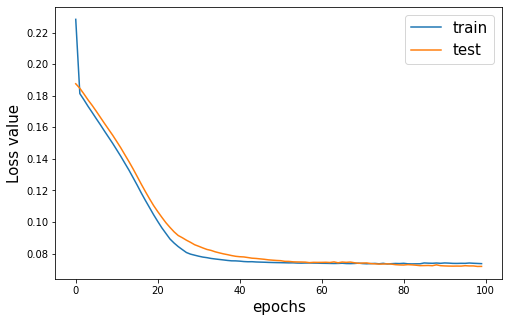

In [ ]:
# plot history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize=15)
plt.xlabel('epochs', fontsize = 15)
plt.ylabel('Loss value', fontsize = 15)
plt.savefig("lossLSTM.pdf")
plt.show()

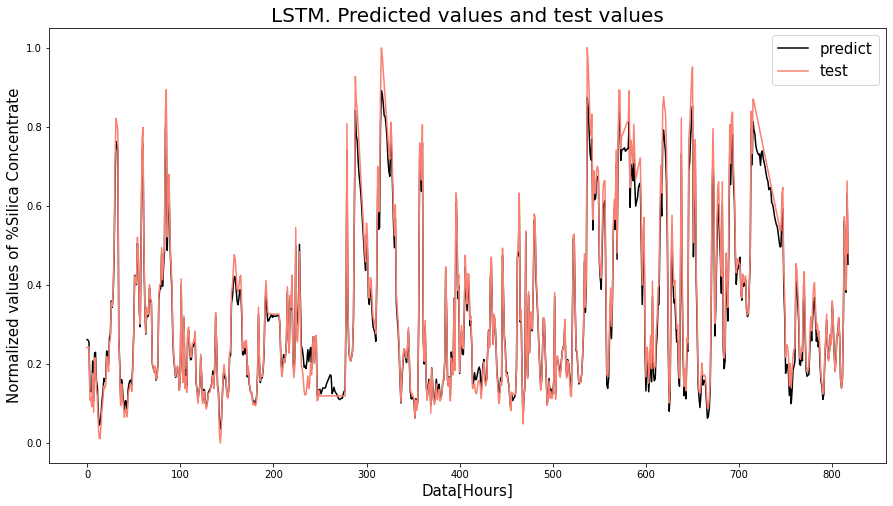

In [ ]:

pred = model.predict(test_X)
plt.figure(figsize=(15, 8))
plt.plot(pred[1:819,0], label='predict', color='black')
plt.plot(test_y[:818], label='test', color = 'salmon')


plt.title('LSTM. Predicted values and test values', fontsize=20)
plt.xlabel('Data[Hours]', fontsize = 15)
plt.ylabel('Normalized values of %Silica Concentrate', fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig("regressionLSTM.pdf")
plt.show()

No handles with labels found to put in legend.


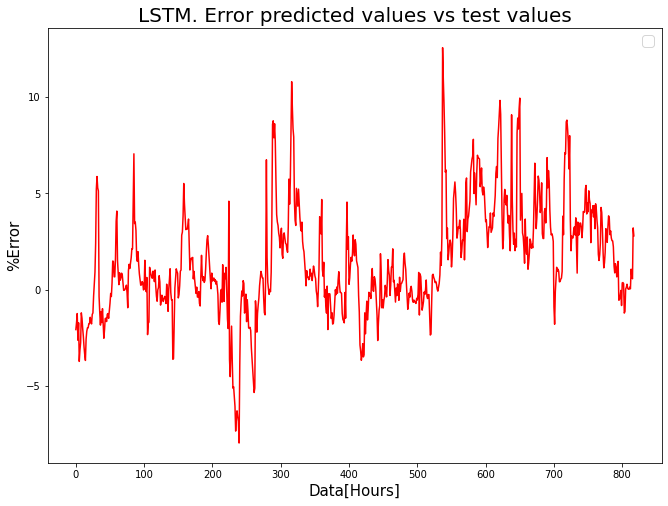

In [ ]:
#error plot 

pred = model.predict(test_X)
plt.figure(figsize=(11, 8))

error = test_y[:818]-pred[1:819,0] 

#error_percent = error*100/test_y.max()

plt.plot(range(error.shape[0]) ,error*100, color = 'red')

plt.title('LSTM. Error predicted values vs test values', fontsize=20)
plt.xlabel('Data[Hours]', fontsize = 15)
plt.ylabel('%Error', fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig("LSTM_error.pdf")
plt.show()

In [ ]:
error.max() *100

11.443573236465475

# METRICS LSTM

In [ ]:
from sklearn import metrics

# Predict
pred = model.predict(test_X)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,test_y)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.011659447218688767


In [ ]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,test_y))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.10797892025154153


In [ ]:
#mae
from sklearn.metrics import mean_absolute_error
pred = model.predict(test_X)
score = mean_absolute_error(test_y, pred, multioutput='raw_values')
print("Final score (MAE): {}".format(score))

Final score (MAE): [0.0706564]


# LSTM IMPLEMENTATION without mean()





In [ ]:

from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



values = new_df_notmean.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[(reframed.shape[1]-21):(reframed.shape[1]-1)], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
n_train_hours = round(reframed.shape[0] * 0.8) #70% of data for training
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


from tensorflow.keras.callbacks import EarlyStopping



# design network
model = Sequential()
model.add(LSTM(25, activation='sigmoid', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=42, validation_data=(test_X, test_y), verbose=2, shuffle=False)

 

(3366, 1, 25) (3366,) (841, 1, 25) (841,)
Epoch 1/100
81/81 - 0s - loss: 0.1821 - val_loss: 0.1745
Epoch 2/100
81/81 - 0s - loss: 0.1712 - val_loss: 0.1678
Epoch 3/100
81/81 - 0s - loss: 0.1644 - val_loss: 0.1616
Epoch 4/100
81/81 - 0s - loss: 0.1576 - val_loss: 0.1558
Epoch 5/100
81/81 - 0s - loss: 0.1512 - val_loss: 0.1504
Epoch 6/100
81/81 - 0s - loss: 0.1448 - val_loss: 0.1457
Epoch 7/100
81/81 - 0s - loss: 0.1392 - val_loss: 0.1403
Epoch 8/100
81/81 - 0s - loss: 0.1340 - val_loss: 0.1358
Epoch 9/100
81/81 - 0s - loss: 0.1290 - val_loss: 0.1309
Epoch 10/100
81/81 - 0s - loss: 0.1241 - val_loss: 0.1260
Epoch 11/100
81/81 - 0s - loss: 0.1195 - val_loss: 0.1218
Epoch 12/100
81/81 - 0s - loss: 0.1146 - val_loss: 0.1190
Epoch 13/100
81/81 - 0s - loss: 0.1102 - val_loss: 0.1153
Epoch 14/100
81/81 - 0s - loss: 0.1069 - val_loss: 0.1113
Epoch 15/100
81/81 - 0s - loss: 0.1043 - val_loss: 0.1085
Epoch 16/100
81/81 - 0s - loss: 0.1027 - val_loss: 0.1058
Epoch 17/100
81/81 - 0s - loss: 0.1020 

# Save Model

In [ ]:
#save the model
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#READ MODEL
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
model.compile(loss='mae', optimizer='adam')


Loaded model from disk


# Test Model

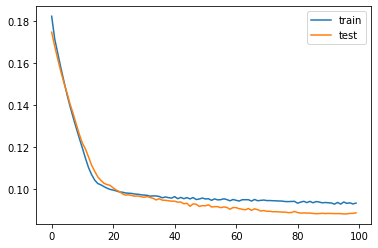

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig("lossLSTM.pdf")
plt.show()

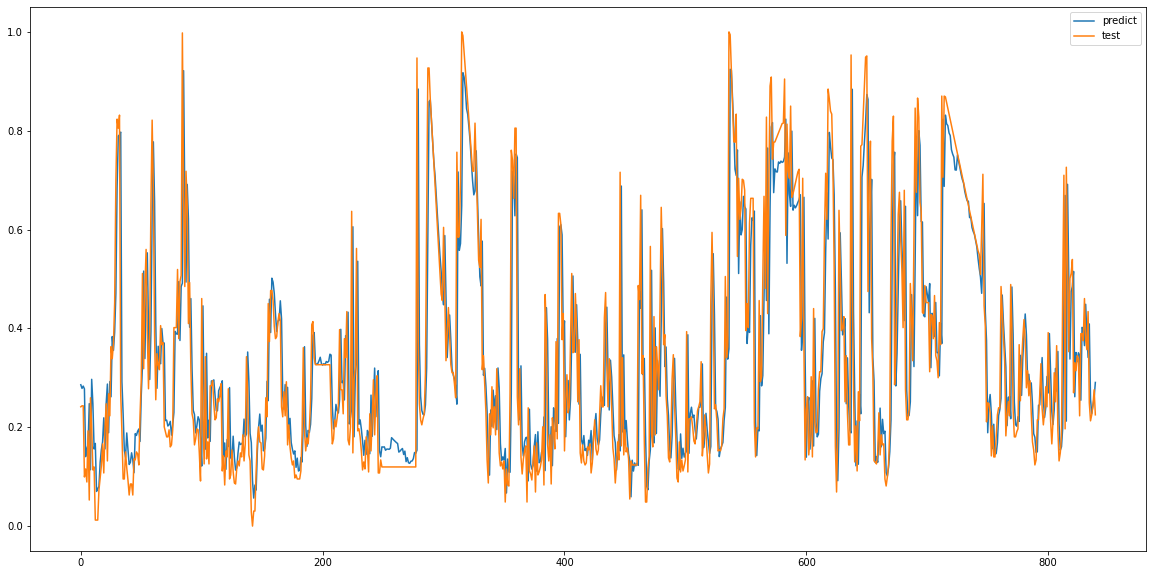

In [ ]:

pred = model.predict(test_X)
plt.figure(figsize=(20, 10))
plt.plot(pred[1:10**4], label='predict')
plt.plot(test_y[1:10**4], label='test')

plt.legend()
plt.savefig("regressionLSTM.pdf")
plt.show()

In [ ]:
from sklearn import metrics

# Predict
pred = model.predict(test_X)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,test_y)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.018947449658830183


In [ ]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,test_y))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.13764973541140638
